In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score



In [3]:
# every time you start your notebook, the data will be cleaned. we need to bring a copy from the google drive
!cp /content/drive/MyDrive/Data/advertising.csv /content/

In [4]:
df = pd.read_csv('advertising.csv')

Text(0.5, 1.0, 'Sales vs TV')

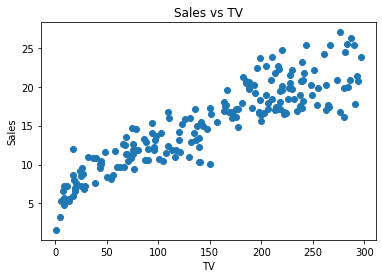

In [5]:
plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

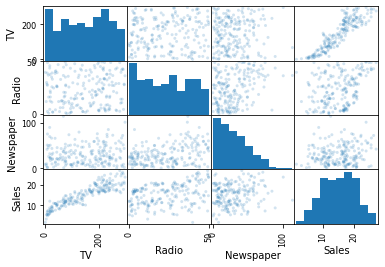

In [6]:
# pd.plotting.scatter_matrix(df, alpha=0.2)


In [7]:
X = df["TV"].values
y = df["Sales"].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [19]:
#model validation

r_squared = model.score(X_train.reshape(-1, 1), y_train)
print("R2:", r_squared)

R2: 0.8144149215442651


In [20]:
# validating accuracy of coefficients 
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     693.4
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.15e-59
Time:                        01:52:22   Log-Likelihood:                -362.42
No. Observations:                 160   AIC:                             728.8
Df Residuals:                     158   BIC:                             735.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9572      0.369     18.834      0.0

In [10]:
# predicting values
y_pred = model.predict(X_test.reshape(-1, 1))

In [23]:
print("R2:", r2_score(y_pred, y_test))
print("MSE:", mean_squared_error(y_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))



R2: 0.7732721862261756
MSE: 4.39847421764548
RMSE: 2.09725397070681


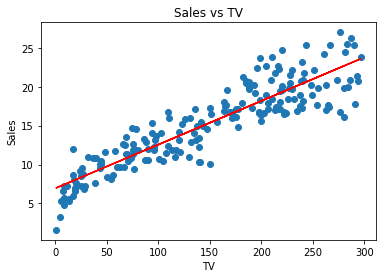

In [22]:
plot.scatter(df["TV"], df["Sales"])
plot.xlabel("TV")
plot.ylabel("Sales")
plot.title("Sales vs TV")
plot.plot(X_train, model.predict(X_train.reshape(-1, 1)), color='red')